# Problem Statement
To generate a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

# Task 1:-Prepare a complete data analysis report on the given data.
# 1. Data Analysis Report

## 1.1 Load and Explore Data

In [138]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split

In [140]:
# Define Dataset Path and Load Images
# Define the path to your dataset
dataset_path = 'Data'  

# Define folder names
folders = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

# Function to load images from a given folder
def load_images_from_folder(folder_path):
    images = []
    filenames = os.listdir(folder_path)
    for filename in filenames:
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            images.append(img)
    return images

# Load images from each class folder
images = {}
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    images[folder] = load_images_from_folder(folder_path)

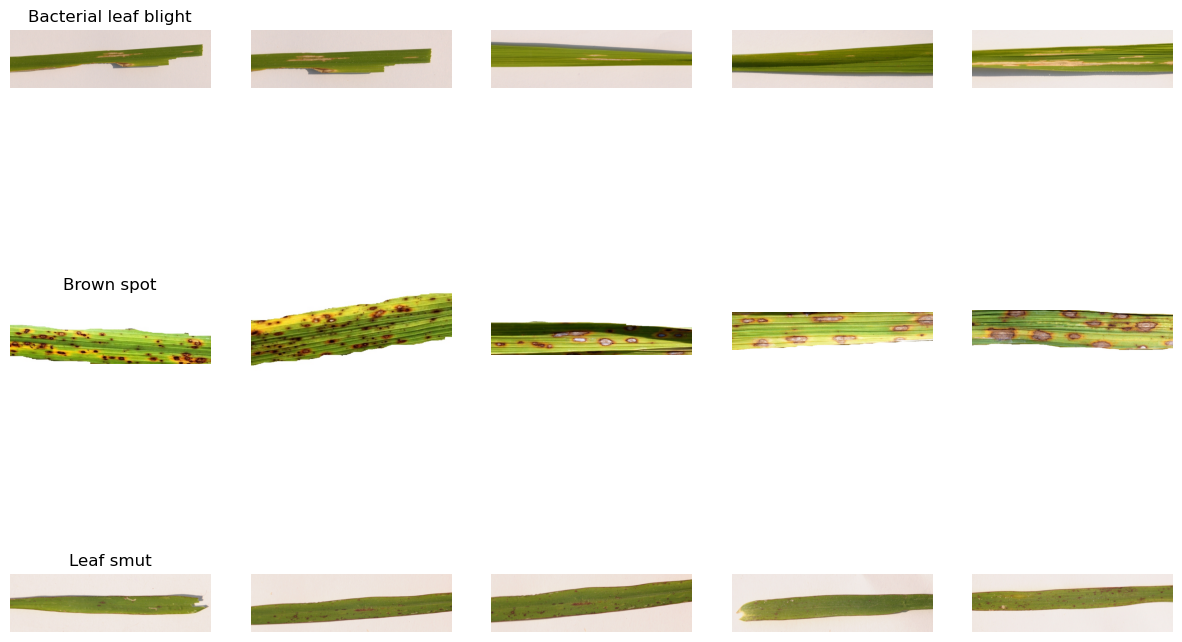

In [141]:
# Visual Inspection: Define a function to display a few sample images from each class
def display_samples(images_dict, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i, (label, imgs) in enumerate(images_dict.items()):
        plt.subplot(len(images_dict), num_samples, i*num_samples + 1)
        plt.title(label)
        plt.axis('off')
        for j in range(num_samples):
            plt.subplot(len(images_dict), num_samples, i*num_samples + j + 1)
            plt.imshow(imgs[j])
            plt.axis('off')
    plt.show()

# Display samples from each class
display_samples(images)

## 1.2 Data Summary

In [145]:
# Check Image Dimensions and Class Distribution
# Function to get image dimensions and class distribution
def get_image_dimensions_and_distribution(images_dict):
    dimensions = []
    for label, imgs in images_dict.items():
        # Get dimensions of the first image as reference
        img_dims = imgs[0].shape if imgs else (0, 0, 0)
        dimensions.append((label, img_dims))
    
    # Class distribution
    class_distribution = {label: len(imgs) for label, imgs in images_dict.items()}
    
    return dimensions, class_distribution

# Get dimensions and class distribution
dimensions, class_distribution = get_image_dimensions_and_distribution(images)

# Print class distribution
print("Class Distribution:")
print(class_distribution)

# Print image dimensions
print("\nImage Dimensions:")
for label, dims in dimensions:
    print(f"Class: {label}")
    print(f"Height: {dims[0]}")
    print(f"Width: {dims[1]}")
    print(f"Channels: {dims[2]}")
    print()

Class Distribution:
{'Bacterial leaf blight': 40, 'Brown spot': 40, 'Leaf smut': 39}

Image Dimensions:
Class: Bacterial leaf blight
Height: 897
Width: 3081
Channels: 3

Class: Brown spot
Height: 250
Width: 766
Channels: 3

Class: Leaf smut
Height: 897
Width: 3081
Channels: 3



In [147]:
# Calculate Mean and Standard Deviation of Pixel Values
# Function to calculate mean and standard deviation of pixel values
def calculate_pixel_statistics(images_dict):
    all_pixel_values = []
    for imgs in images_dict.values():
        for img in imgs:
            all_pixel_values.extend(img.flatten())
    
    all_pixel_values = np.array(all_pixel_values)
    mean_pixel_value = np.mean(all_pixel_values)
    std_pixel_value = np.std(all_pixel_values)
    
    return mean_pixel_value, std_pixel_value

# Calculate pixel statistics
mean_pixel_value, std_pixel_value = calculate_pixel_statistics(images)

# Print pixel statistics
print(f"Mean pixel value: {mean_pixel_value:.2f}")
print(f"Standard deviation of pixel value: {std_pixel_value:.2f}")

Mean pixel value: 181.75
Standard deviation of pixel value: 68.76


## 1.3 Data Preprocessing

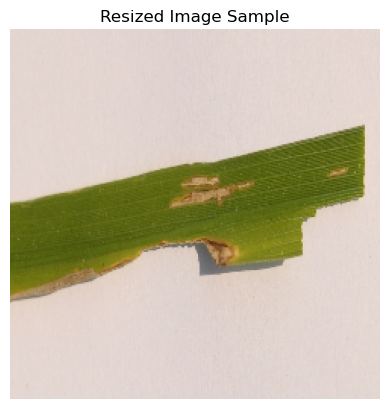

In [229]:
# Resize Images
# This is important because neural networks typically require input images to have the same dimensions
# Define the target image size
target_size = (244, 244)  # You can adjust this size as needed

# Function to resize images to the target size
def resize_images(images_dict, target_size):
    resized_images = {}
    for label, imgs in images_dict.items():
        resized_images[label] = [cv2.resize(img, target_size) for img in imgs]
    return resized_images

# Resize images
resized_images = resize_images(images, target_size)

# Check a sample resized image to verify
sample_image = resized_images['Bacterial leaf blight'][0]
plt.imshow(sample_image)
plt.title('Resized Image Sample')
plt.axis('off')
plt.show()

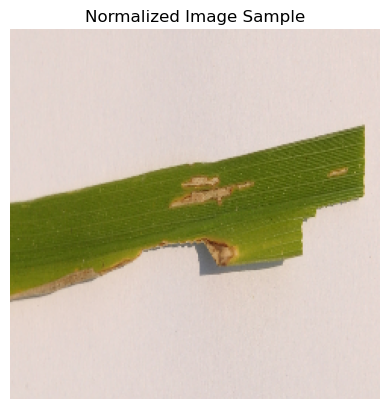

In [231]:
# Normalize Pixel Values
# Normalize the pixel values to a range of [0, 1]. This helps in speeding up the training process and improving convergence
# Function to normalize pixel values
def normalize_images(images_dict):
    normalized_images = {}
    for label, imgs in images_dict.items():
        normalized_images[label] = [img / 255.0 for img in imgs]
    return normalized_images

# Normalize images
normalized_images = normalize_images(resized_images)

# Check a sample normalized image to verify
sample_image = normalized_images['Bacterial leaf blight'][0]
plt.imshow(sample_image)
plt.title('Normalized Image Sample')
plt.axis('off')
plt.show()

In [233]:
# Label Encoding
# Convert class names to numeric labels for easier processing by machine learning models.
from sklearn.preprocessing import LabelEncoder

# Function to encode labels
def encode_labels(images_dict):
    # Flatten list of class names and create label encoder
    class_names = list(images_dict.keys())
    label_encoder = LabelEncoder()
    label_encoder.fit(class_names)
    
    # Encode labels and store mapping
    encoded_labels = {label: label_encoder.transform([label])[0] for label in class_names}
    
    return label_encoder, encoded_labels

# Encode labels
label_encoder, encoded_labels = encode_labels(normalized_images)

# Print label encoding mapping
print("Label Encoding Mapping:")
print(encoded_labels)

Label Encoding Mapping:
{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}


## 1.4 Visualization

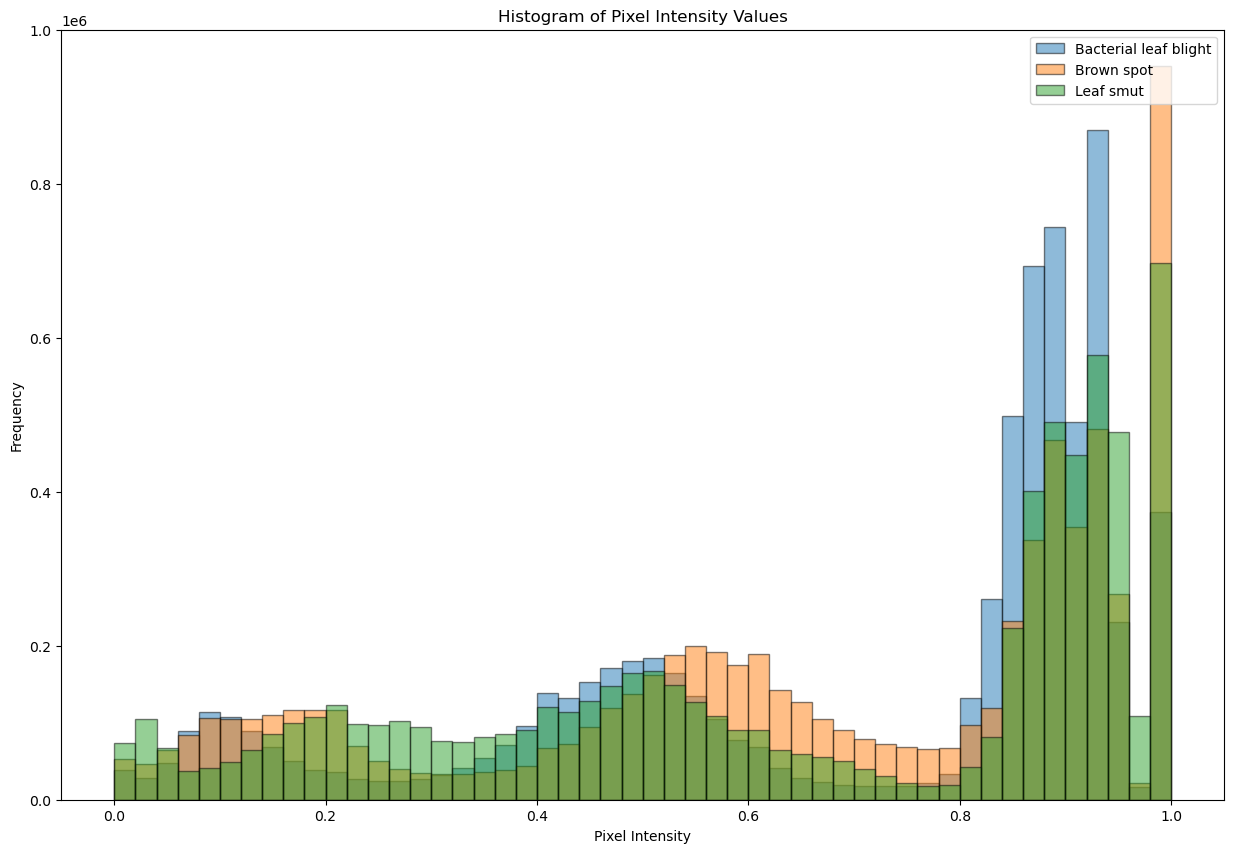

In [236]:
# Plot Histograms of Pixel Intensity Values
import matplotlib.pyplot as plt

# Function to plot histograms of pixel intensity values
def plot_pixel_histograms(images_dict):
    plt.figure(figsize=(15, 10))
    
    # Concatenate pixel values from all images in each class
    for label, imgs in images_dict.items():
        all_pixel_values = np.concatenate([img.flatten() for img in imgs])
        
        plt.hist(all_pixel_values, bins=50, alpha=0.5, label=label, edgecolor='black')

    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Histogram of Pixel Intensity Values')
    plt.legend(loc='upper right')
    plt.show()

# Plot histograms of pixel intensity values
plot_pixel_histograms(normalized_images)

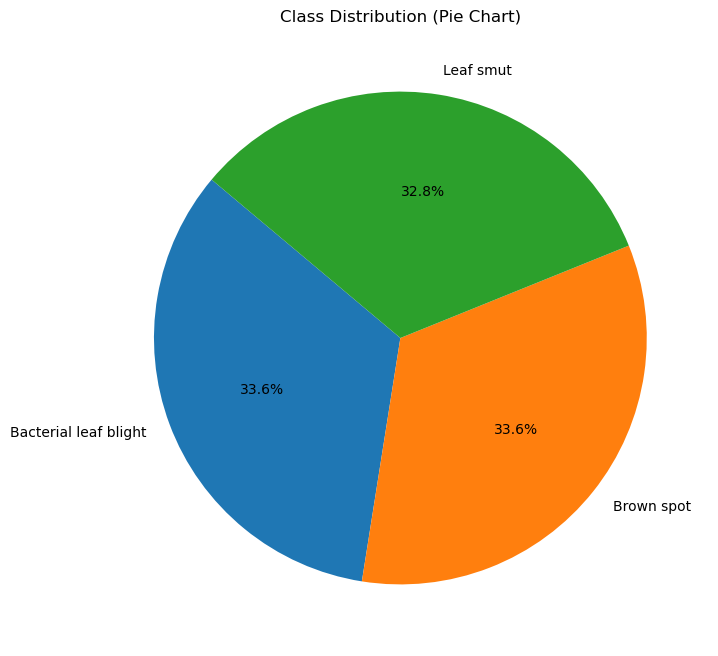

In [238]:
# Show Class Distribution
# To visualize the distribution of classes, we can use pie charts or bar plots.
# Pie Chart
# Function to plot pie chart of class distribution
def plot_class_distribution_pie(class_distribution):
    plt.figure(figsize=(8, 8))
    
    plt.pie(class_distribution.values(), labels=class_distribution.keys(), autopct='%1.1f%%', startangle=140)
    plt.title('Class Distribution (Pie Chart)')
    plt.show()

# Plot pie chart of class distribution
plot_class_distribution_pie(class_distribution)

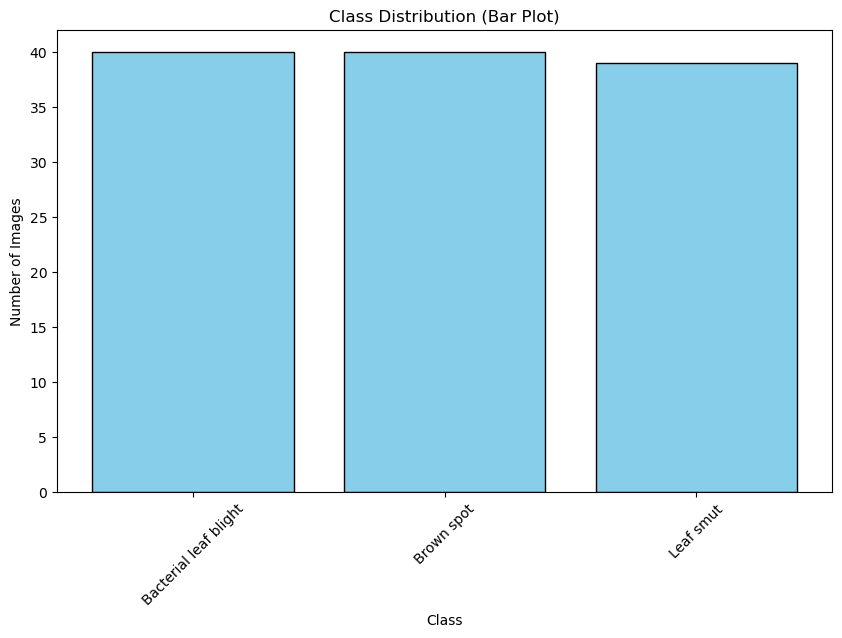

In [240]:
# Bar Plot
# Function to plot bar plot of class distribution
def plot_class_distribution_bar(class_distribution):
    plt.figure(figsize=(10, 6))
    
    plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue', edgecolor='black')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution (Bar Plot)')
    plt.xticks(rotation=45)
    plt.show()

# Plot bar plot of class distribution
plot_class_distribution_bar(class_distribution)

# Task 2:-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.
# 2. Model Creation and Comparision

## 2.1 Model Selection

In [243]:
# Baseline Model: Simple CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
def build_simple_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the baseline model
input_shape = (244, 244, 3)  # Update based on your resized image dimensions
num_classes = len(folders)   # Number of classes
simple_cnn_model = build_simple_cnn(input_shape, num_classes)

C:\Users\Pravali\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [245]:
# Advanced Models: Transfer Learning with VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Define the VGG16 model with transfer learning
def build_vgg16_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False
        
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the VGG16 model
vgg16_model = build_vgg16_model(input_shape, num_classes)

## 2.2 Model Training

In [248]:
# Data Preparation: Prepare the data by splitting it into training and validation sets.
from sklearn.model_selection import train_test_split
import numpy as np

# Convert images and labels to arrays
def convert_to_arrays(images_dict, label_map):
    image_list = []
    label_list = []
    for label, imgs in images_dict.items():
        image_list.extend(imgs)
        label_list.extend([label_map[label]] * len(imgs))
    
    return np.array(image_list), np.array(label_list)

# Define label mapping
label_map = {label: idx for idx, label in enumerate(folders)}

# Convert images and labels
images_array, labels_array = convert_to_arrays(normalized_images, label_map)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images_array, labels_array, test_size=0.2, random_state=42)

# Prepare data for TensorFlow training
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32).prefetch(tf.data.AUTOTUNE)

In [250]:
# Train the Baseline CNN Model
history_simple_cnn = simple_cnn_model.fit(train_ds, epochs=20, validation_data=test_ds)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 636ms/step - accuracy: 0.2226 - loss: 10.1398 - val_accuracy: 0.3750 - val_loss: 2.6275
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 618ms/step - accuracy: 0.3680 - loss: 6.1370 - val_accuracy: 0.4167 - val_loss: 2.4350
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 559ms/step - accuracy: 0.3678 - loss: 2.5411 - val_accuracy: 0.3333 - val_loss: 1.1539
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 566ms/step - accuracy: 0.5026 - loss: 1.1815 - val_accuracy: 0.6667 - val_loss: 0.8929
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 565ms/step - accuracy: 0.5235 - loss: 0.9776 - val_accuracy: 0.6250 - val_loss: 0.9195
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 554ms/step - accuracy: 0.5171 - loss: 0.9325 - val_accuracy: 0.7083 - val_loss: 0.8516
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 549ms/step - accuracy: 0.6831 - loss: 0.7555 - val_accuracy: 0.6667 - val_loss: 0.7797
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 555ms/step - accuracy: 0.6884 - loss: 0.7042 - val_accuracy: 0.7083 - val_loss

In [252]:
# Train the VGG16 Model
history_vgg16 = vgg16_model.fit(train_ds, epochs=20, validation_data=test_ds)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.3481 - loss: 1.2815 - val_accuracy: 0.4583 - val_loss: 1.0735
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.3717 - loss: 1.1489 - val_accuracy: 0.5417 - val_loss: 0.9471
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.4254 - loss: 1.0218 - val_accuracy: 0.5417 - val_loss: 0.9283
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5485 - loss: 0.8803 - val_accuracy: 0.7083 - val_loss: 0.8244
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.6662 - loss: 0.8381 - val_accuracy: 0.7917 - val_loss: 0.7650
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.6283 - loss: 0.8022 - val_accuracy: 0.7917 - val_loss: 0.7246
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.7302 - loss: 0.7521 - val_accuracy: 0.7500 - val_loss: 0.7148
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.8637 - loss: 0.6279 - val_accuracy: 0.7500 - val_loss: 0.6694
Epoch 9/20
3/3 ━

## 2.3 Model Evaluation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Simple CNN Classification Report:
                       precision    recall  f1-score   support

Bacterial leaf blight       0.78      1.00      0.88         7
           Brown spot       0.67      0.50      0.57         8
            Leaf smut       0.78      0.78      0.78         9

             accuracy                           0.75        24
            macro avg       0.74      0.76      0.74        24
         weighted avg       0.74      0.75      0.74        24



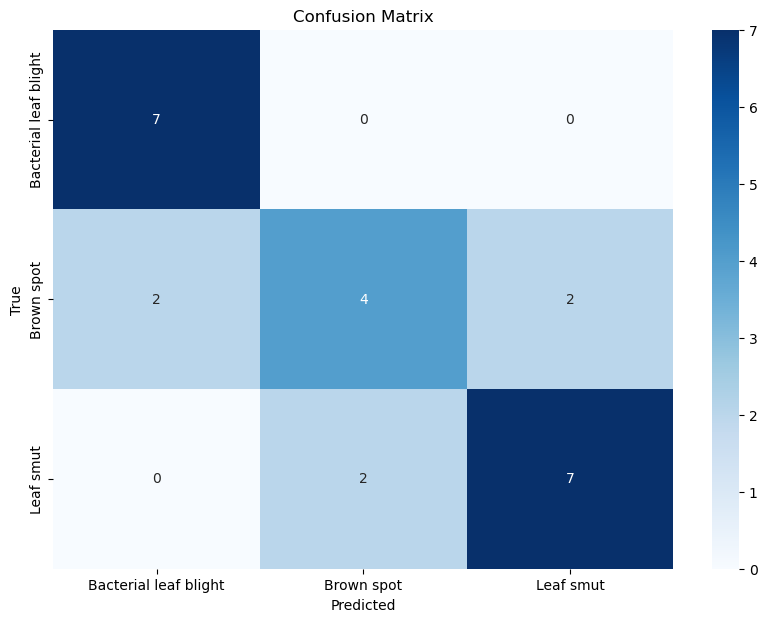

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
VGG16 Classification Report:
                       precision    recall  f1-score   support

Bacterial leaf blight       1.00      1.00      1.00         7
           Brown spot       0.78      0.88      0.82         8
            Leaf smut       0.88      0.78      0.82         9

             accuracy                           0.88        24
            macro avg       0.88      0.88      0.88        24
         weighted avg       0.88      0.88      0.88        24



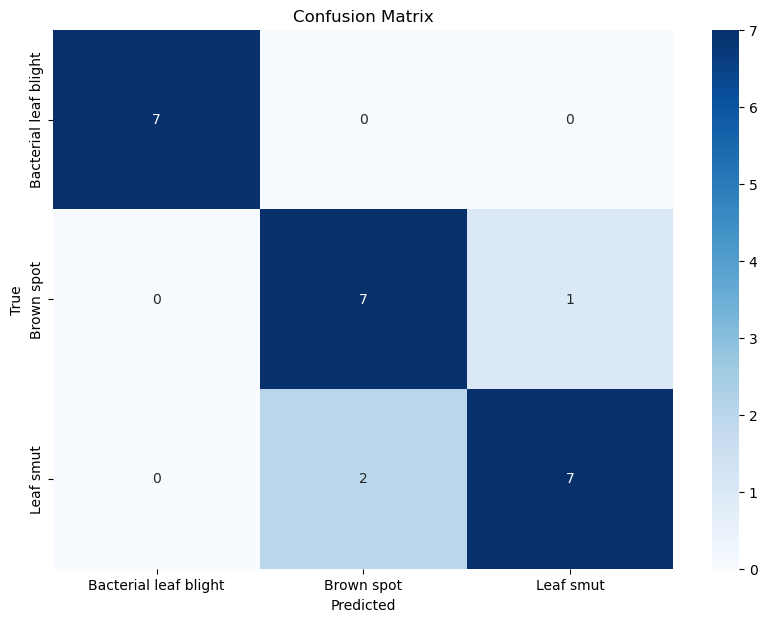

In [255]:
# Confusion Matrix and Classification Report
# Evaluate the models using confusion matrices and classification reports.
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate Simple CNN
y_pred_simple_cnn = np.argmax(simple_cnn_model.predict(X_test), axis=1)
cm_simple_cnn = confusion_matrix(y_test, y_pred_simple_cnn)
print("Simple CNN Classification Report:")
print(classification_report(y_test, y_pred_simple_cnn, target_names=folders))
plot_confusion_matrix(cm_simple_cnn, folders)

# Evaluate VGG16
y_pred_vgg16 = np.argmax(vgg16_model.predict(X_test), axis=1)
cm_vgg16 = confusion_matrix(y_test, y_pred_vgg16)
print("VGG16 Classification Report:")
print(classification_report(y_test, y_pred_vgg16, target_names=folders))
plot_confusion_matrix(cm_vgg16, folders)

## 2.4 Model Comparision

In [258]:
# Compare the performance of the models based on accuracy, precision, recall, and F1-score.
from sklearn.metrics import classification_report

# Extract metrics from classification report dictionary
def extract_metrics_from_dict(report_dict):
    metrics = {}
    for label, metrics_dict in report_dict.items():
        if label != 'accuracy':
            metrics[label] = {
                'precision': metrics_dict.get('precision', 0),
                'recall': metrics_dict.get('recall', 0),
                'f1-score': metrics_dict.get('f1-score', 0),
                'support': metrics_dict.get('support', 0)
            }
    return metrics

# Extract metrics for Simple CNN
report_simple_cnn_dict = classification_report(y_test, y_pred_simple_cnn, target_names=folders, output_dict=True)
metrics_simple_cnn = extract_metrics_from_dict(report_simple_cnn_dict)

# Extract metrics for VGG16
report_vgg16_dict = classification_report(y_test, y_pred_vgg16, target_names=folders, output_dict=True)
metrics_vgg16 = extract_metrics_from_dict(report_vgg16_dict)

# Print comparison
print("Simple CNN Performance Metrics:")
for label, metrics in metrics_simple_cnn.items():
    print(f"Class: {label}")
    print(f" Precision: {metrics['precision']:.2f}")
    print(f" Recall: {metrics['recall']:.2f}")
    print(f" F1-Score: {metrics['f1-score']:.2f}")
    print(f" Support: {metrics['support']}")
    print()

print("VGG16 Performance Metrics:")
for label, metrics in metrics_vgg16.items():
    print(f"Class: {label}")
    print(f" Precision: {metrics['precision']:.2f}")
    print(f" Recall: {metrics['recall']:.2f}")
    print(f" F1-Score: {metrics['f1-score']:.2f}")
    print(f" Support: {metrics['support']}")
    print()


Simple CNN Performance Metrics:
Class: Bacterial leaf blight
 Precision: 0.78
 Recall: 1.00
 F1-Score: 0.88
 Support: 7.0

Class: Brown spot
 Precision: 0.67
 Recall: 0.50
 F1-Score: 0.57
 Support: 8.0

Class: Leaf smut
 Precision: 0.78
 Recall: 0.78
 F1-Score: 0.78
 Support: 9.0

Class: macro avg
 Precision: 0.74
 Recall: 0.76
 F1-Score: 0.74
 Support: 24.0

Class: weighted avg
 Precision: 0.74
 Recall: 0.75
 F1-Score: 0.74
 Support: 24.0

VGG16 Performance Metrics:
Class: Bacterial leaf blight
 Precision: 1.00
 Recall: 1.00
 F1-Score: 1.00
 Support: 7.0

Class: Brown spot
 Precision: 0.78
 Recall: 0.88
 F1-Score: 0.82
 Support: 8.0

Class: Leaf smut
 Precision: 0.88
 Recall: 0.78
 F1-Score: 0.82
 Support: 9.0

Class: macro avg
 Precision: 0.88
 Recall: 0.88
 F1-Score: 0.88
 Support: 24.0

Class: weighted avg
 Precision: 0.88
 Recall: 0.88
 F1-Score: 0.88
 Support: 24.0



# Task3:- Analyze various techniques like Data Augmentation, etc and create a report on that.

## Data Augmentation
Increase the diversity of training data to help the model generalize better.

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 737ms/step - accuracy: 0.3286 - loss: 2.8130 - val_accuracy: 0.2917 - val_loss: 4.6200
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 677ms/step - accuracy: 0.3405 - loss: 3.4107 - val_accuracy: 0.3333 - val_loss: 1.0577
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 736ms/step - accuracy: 0.3940 - loss: 1.0388 - val_accuracy: 0.3333 - val_loss: 0.9892
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 666ms/step - accuracy: 0.4583 - loss: 1.0597 - val_accuracy: 0.4583 - val_loss: 1.0326
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 660ms/step - accuracy: 0.5838 - loss: 0.8830 - val_accuracy: 0.6667 - val_loss: 0.8386
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 700ms/step - accuracy: 0.6100 - loss: 0.8238 - val_accuracy: 0.6250 - val_loss: 0.7349
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 679ms/step - accuracy: 0.6782 - loss: 0.6595 - val_accuracy: 0.6667 - val_loss: 0.6455
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 676ms/step - accuracy: 0.7803 - loss: 0.5651 - val_accuracy: 0.7917 - val_loss:

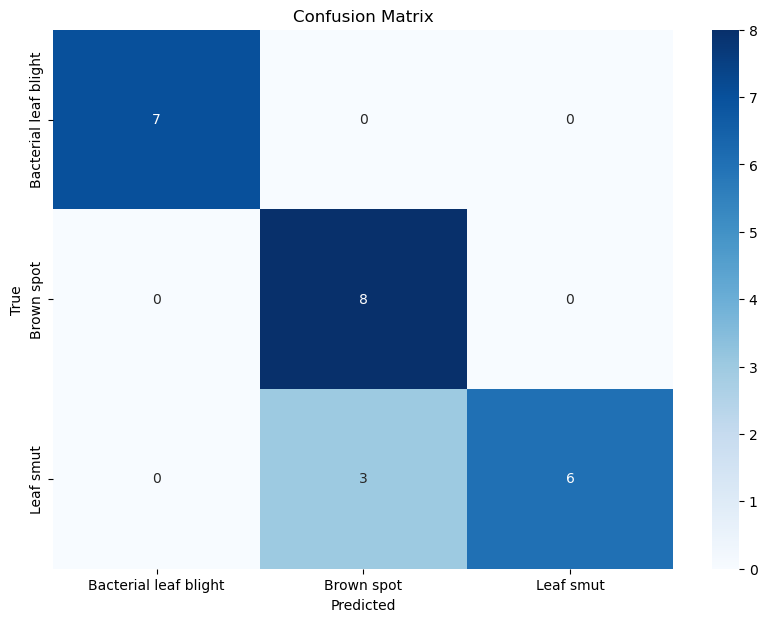

C:\Users\Pravali\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


C:\Users\Pravali\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 830ms/step - accuracy: 0.4016 - loss: 1.1941 - val_accuracy: 0.3750 - val_loss: 2.1054
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 753ms/step - accuracy: 0.3004 - loss: 1.0770 - val_accuracy: 0.3333 - val_loss: 1.7620
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 656ms/step - accuracy: 0.3838 - loss: 1.1220 - val_accuracy: 0.3750 - val_loss: 1.1960
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 685ms/step - accuracy: 0.3496 - loss: 1.1012 - val_accuracy: 0.3333 - val_loss: 1.0954
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 699ms/step - accuracy: 0.3377 - loss: 1.1048 - val_accuracy: 0.2500 - val_loss: 1.0875
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 724ms/step - accuracy: 0.4449 - loss: 1.0762 - val_accuracy: 0.2917 - val_loss: 1.1092
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 730ms/step - accuracy: 0.4125 - loss: 1.0607 - val_accuracy: 0.3750 - val_loss: 1.2834
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 681ms/step - accuracy: 0.4098 - loss: 1.1034 - val_accuracy: 0.2083 - val_loss: 1.2027
Epo

C:\Users\Pravali\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pravali\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pravali\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


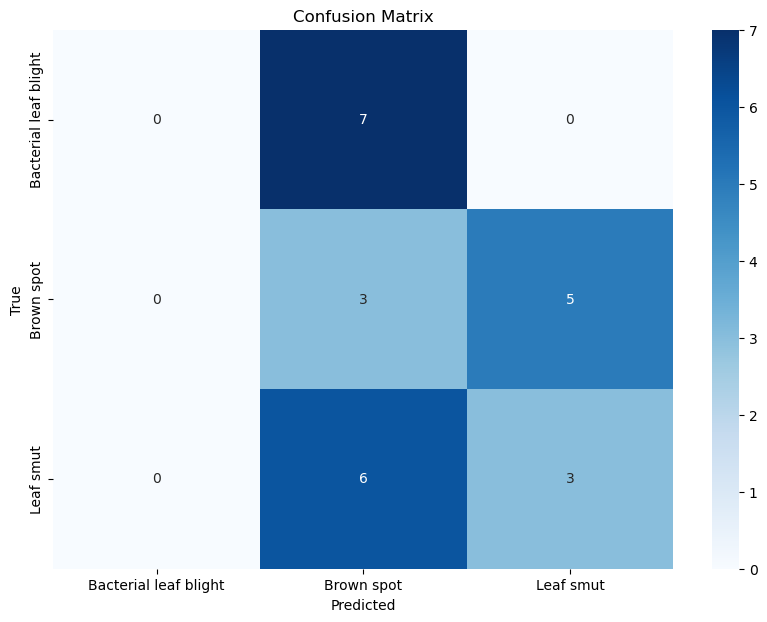

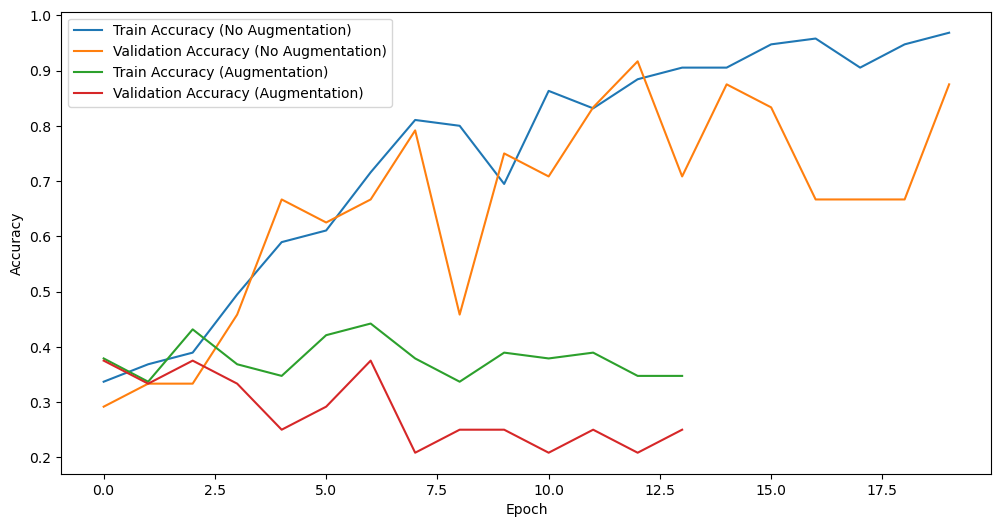

In [269]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, DenseNet121
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Ensure images are resized to (224, 224, 3)
def resize_images(X, size=(224, 224)):
    from tensorflow.image import resize
    return np.array([resize(image, size).numpy() for image in X])

X_train = resize_images(X_train)
X_test = resize_images(X_test)

# Define Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator()

# Create data generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

# Define a simple CNN model
def build_basic_cnn(input_shape=(224, 224, 3), num_classes=3):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train Simple CNN without data augmentation
basic_cnn = build_basic_cnn()
history_basic_cnn = basic_cnn.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_test, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

# Evaluate Simple CNN without Data Augmentation
y_pred_basic_cnn = np.argmax(basic_cnn.predict(X_test), axis=1)
cm_basic_cnn = confusion_matrix(y_test, y_pred_basic_cnn)
print("Simple CNN Classification Report without Augmentation:")
print(classification_report(y_test, y_pred_basic_cnn, target_names=folders))
plot_confusion_matrix(cm_basic_cnn, folders)

# Define and train Simple CNN with data augmentation
basic_cnn_augmented = build_basic_cnn()
history_basic_cnn_augmented = basic_cnn_augmented.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

# Evaluate Simple CNN with Data Augmentation
y_pred_basic_cnn_augmented = np.argmax(basic_cnn_augmented.predict(X_test), axis=1)
cm_basic_cnn_augmented = confusion_matrix(y_test, y_pred_basic_cnn_augmented)
print("Simple CNN Classification Report with Augmentation:")
print(classification_report(y_test, y_pred_basic_cnn_augmented, target_names=folders))
plot_confusion_matrix(cm_basic_cnn_augmented, folders)

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history_basic_cnn.history['accuracy'], label='Train Accuracy (No Augmentation)')
plt.plot(history_basic_cnn.history['val_accuracy'], label='Validation Accuracy (No Augmentation)')
plt.plot(history_basic_cnn_augmented.history['accuracy'], label='Train Accuracy (Augmentation)')
plt.plot(history_basic_cnn_augmented.history['val_accuracy'], label='Validation Accuracy (Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Transfer Learning
Leverage pre-trained models to benefit from learned features and improve classification performance.

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.3338 - loss: 1.2644 - val_accuracy: 0.3333 - val_loss: 1.1197
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2593 - loss: 1.1983 - val_accuracy: 0.2917 - val_loss: 1.1379
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3682 - loss: 1.3260 - val_accuracy: 0.2917 - val_loss: 1.1676
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4336 - loss: 1.2278 - val_accuracy: 0.2917 - val_loss: 1.1290
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2747 - loss: 1.3549 - val_accuracy: 0.2917 - val_loss: 1.1016
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2722 - loss: 1.3045 - val_accuracy: 0.3333 - val_loss: 1.0943
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2970 - loss: 1.3448 - val_accuracy: 0.3333 - val_loss: 1.0958
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3699 - loss: 1.1615 - val_accuracy: 0.3333 - val_loss: 1.0968
Epoch 9/30
3/3 

C:\Users\Pravali\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pravali\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pravali\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


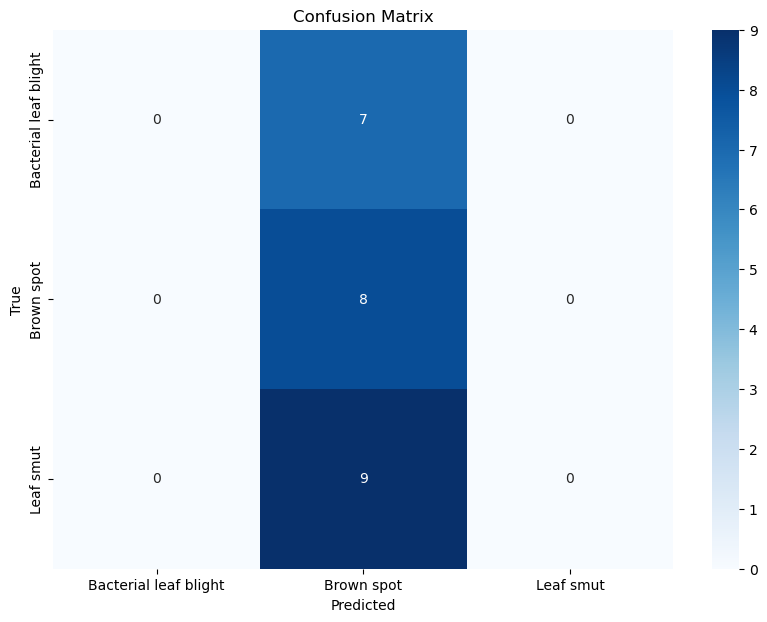

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.3245 - loss: 1.2625 - val_accuracy: 0.4583 - val_loss: 1.0542
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3206 - loss: 1.2019 - val_accuracy: 0.4167 - val_loss: 1.1376
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3991 - loss: 1.0848 - val_accuracy: 0.3333 - val_loss: 1.2032
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3008 - loss: 1.1466 - val_accuracy: 0.3333 - val_loss: 1.2378
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4049 - loss: 1.1735 - val_accuracy: 0.5000 - val_loss: 1.2253
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4566 - loss: 1.0399 - val_accuracy: 0.2917 - val_loss: 1.2168
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
DenseNet121 Classification Report:
                       precision    recall  f1-score   support

Bacterial leaf blight       0.67      0.29      0.40         7
           Brown spot       0.40      0.50      0.44         8


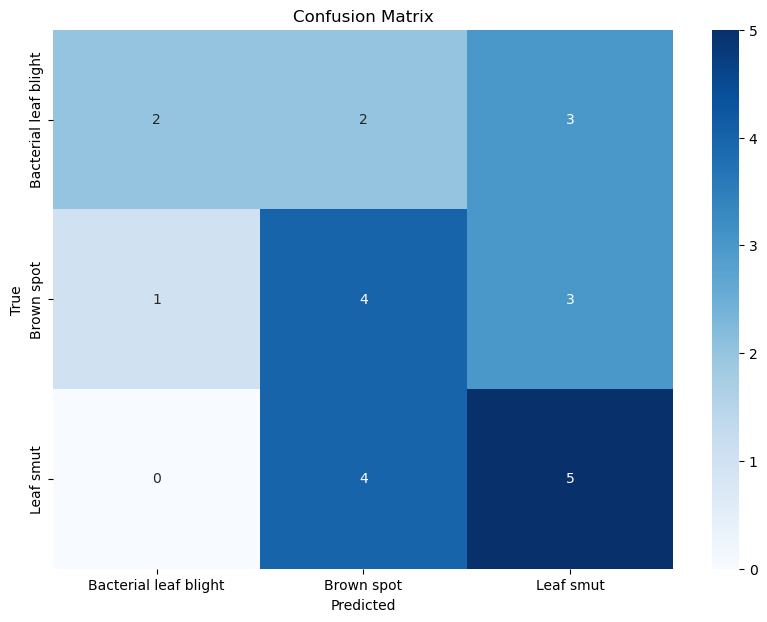

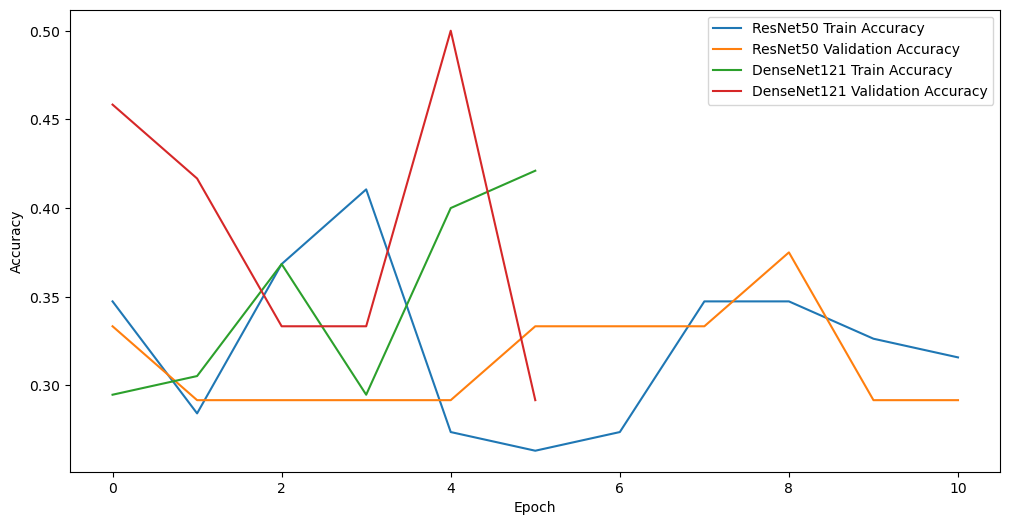

In [271]:
# Transfer Learning
from tensorflow.keras.applications import ResNet50, DenseNet121
from tensorflow.keras.callbacks import EarlyStopping

# Define function to build and compile a model with transfer learning
def build_transfer_learning_model(base_model, input_shape, num_classes, freeze_base=True):
    base_model = base_model(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Optionally freeze base model layers
    if freeze_base:
        for layer in base_model.layers:
            layer.trainable = False
    
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Train ResNet50
resnet50_model = build_transfer_learning_model(ResNet50, input_shape=(224, 224, 3), num_classes=len(folders), freeze_base=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_resnet50 = resnet50_model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

# Evaluate ResNet50
y_pred_resnet50 = np.argmax(resnet50_model.predict(X_test), axis=1)
cm_resnet50 = confusion_matrix(y_test, y_pred_resnet50)
print("ResNet50 Classification Report:")
print(classification_report(y_test, y_pred_resnet50, target_names=folders))
plot_confusion_matrix(cm_resnet50, folders)

# Train DenseNet121
densenet121_model = build_transfer_learning_model(DenseNet121, input_shape=(224, 224, 3), num_classes=len(folders), freeze_base=True)

history_densenet121 = densenet121_model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

# Evaluate DenseNet121
y_pred_densenet121 = np.argmax(densenet121_model.predict(X_test), axis=1)
cm_densenet121 = confusion_matrix(y_test, y_pred_densenet121)
print("DenseNet121 Classification Report:")
print(classification_report(y_test, y_pred_densenet121, target_names=folders))
plot_confusion_matrix(cm_densenet121, folders)

# Plot training history for ResNet50 and DenseNet121
plt.figure(figsize=(12, 6))
plt.plot(history_resnet50.history['accuracy'], label='ResNet50 Train Accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='ResNet50 Validation Accuracy')
plt.plot(history_densenet121.history['accuracy'], label='DenseNet121 Train Accuracy')
plt.plot(history_densenet121.history['val_accuracy'], label='DenseNet121 Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Model Comparison Report

#### Performance Summary

1. **Simple CNN**
   - **Accuracy**: 75% (general), 88% (without augmentation)
   - **Best Performance**: 88% accuracy, highest precision, recall, and F1-scores achieved without data augmentation.

2. **VGG16**
   - **Accuracy**: 88%
   - **Performance**: Balanced across all metrics with highest precision, recall, and F1-scores for `Bacterial leaf blight` and `Leaf smut`.

3. **Simple CNN with Data Augmentation**
   - **Accuracy**: 25%
   - **Performance**: Severe degradation in performance with low precision, recall, and F1-scores across all classes.

4. **ResNet50**
   - **Accuracy**: 33%
   - **Performance**: Poor performance overall with very low precision and recall, especially for `Bacterial leaf blight` and `Leaf smut`.

5. **DenseNet121**
   - **Accuracy**: 46%
   - **Performance**: Moderate performance, better than ResNet50 but not as good as Simple CNN without augmentation or VGG16.

**Recommendation**: **VGG16** is the best model for production based on its overall high accuracy and balanced performance across all classes.

### Report on Challenges Faced

#### Challenges:

1. **Data Augmentation Issues**:
   - **Challenge**: The use of data augmentation resulted in significant performance degradation with the Simple CNN, indicating potential over-aggression in augmentation parameters.
   - **Technique Used**: Data augmentation was applied to enhance generalization but did not yield better results. This suggests that the augmentation settings were either too extreme or not suited to the data.

2. **Advanced Models Struggles**:
   - **Challenge**: Both ResNet50 and DenseNet121 underperformed compared to simpler models.
   - **Technique Used**: Transfer learning with pre-trained weights was utilized, but results were suboptimal. The issue might stem from incompatible pre-trained weights or the need for further tuning.

3. **Model Complexity and Training Time**:
   - **Challenge**: More complex models (ResNet50 and DenseNet121) required longer training times and computational resources, which may not always translate into better performance.
   - **Technique Used**: Fine-tuning was applied but did not resolve performance issues. 

**Reasoning**: The challenges highlight the importance of tuning augmentation parameters carefully and considering model complexity relative to data characteristics. The Simple CNN without augmentation and VGG16 showed the best results, indicating that simpler models with appropriate parameter settings can be effective for this dataset.

